# ADP 통계 기출 24회 ~ 21회

In [15]:
import pandas as pd
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

---

# [ 24회 ]

# < 24회 1번 : 다중회귀, 가변수 >
광고횟수와 광고비에 따른 매출액의 데이터이다.

1. 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정
2. 회귀식이 유의한지 판단 - 모형검정?

In [29]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem2.csv', encoding='cp949')
df.head()

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20


### 접근 방법
1. 광고횟수와 광고비에 따른 매출액
    - 광고횟수, 광고비 : 독립변수 X
    - 매출액 : 종속변수 y
    <br><br/>
    
2. 가변수 처리 : get_dummies() 이용
    - OLS 함수는 자동으로 가변수화 해준다 !
    - formula를 이용하는 smf.ols()는 자동으로 상수항 가정
    - sm,ols(y, X)는 상수항 추가해줘야함
    <br><br/>
    
3. 회귀계수 유의성 검정
    - 회귀계수가 유의하지 않다면?! $\rightarrow$ 추후 방법에 대해서도 생각해보자
    <br><br/>
    
4. 회귀식 유의성 검정
    - 검정통계량(F-통계량)
    - p-value(모델이 유의한지)

### 1-1) 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정
- smf.ols랑 sm.ols 두 shell 코드 결과 동일함
- smf.ols가 훨씬 간략 !!

In [28]:
import statsmodels.formula.api as smf

# mapping을 통한 가변수 처리
# df['광고비'] = df['광고비'].map({'낮음':0,'높음':1})

formula = '매출액 ~ 광고횟수 + 광고비'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 24 May 2023   Prob (F-statistic):           9.96e-08
Time:                        15:49:37   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1641      0.556     21.876      0.000      10.882      13.446
광고비[T.높음]      0.5227      0.536      0.975      0.358      -0.713       1.759
광고횟수           1.4350      0.074     19.518      0.000       1.265       1.605
==============================================================================
Omnibus:                        7.665   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.407
Skew:                           1.265   Prob(JB):                        0.182
Kurtosis:                       4.015   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 분석 결과를 살펴봤을 때, 광고비의 경우 p-value 값이 0.358로 유의수준 0.05에서 유의하지 않고, 나머지 계수는 유의하다고 할 수 있다.

### 1-2) 회귀식이 유의한지 판단

#### F 통계량의 p-value는 유의수준 0.05보다 작으므로, 회귀식은 유의하다고 할 수 있다.

### 참고 : sm.ols 이용 (smf.ols랑 결과 동일함)

In [30]:
import pandas as pd
import statsmodels.api as sm

# 가변수 처리
df = pd.get_dummies(df, columns=['광고비'], drop_first=True)

# 독립변수와 종속변수 설정
X = df.drop('매출액', axis=1)
y = df['매출액']

# 다중회귀 모델 학습
X = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 24 May 2023   Prob (F-statistic):           9.96e-08
Time:                        15:53:16   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1641      0.556     21.876      0.000      10.882      13.446
광고횟수           1.4350      0.074     19.518      0.000       1.265       1.605
광고비_높음         0.5227      0.536      0.975      0.358      -0.713       1.759
==============================================================================
Omnibus:                        7.665   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.407
Skew:                           1.265   Prob(JB):                        0.182
Kurtosis:                       4.015   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# 회귀계수 유의성 검정
p_values = result.pvalues[1:]  # 상수항 제외한 변수의 p-value
significant_coeffs = p_values[p_values < 0.05]  # 유의수준 0.05로 설정

print("유의한 회귀계수:")
print(significant_coeffs)

# 회귀식 유의성 검정
if result.f_pvalue < 0.05:
    print("회귀식이 유의합니다.")
else:
    print("회귀식이 유의하지 않습니다.")

유의한 회귀계수:
광고횟수    4.935243e-08
dtype: float64
회귀식이 유의합니다.


## < 24회 2번 : 이표본 '평균 차이' 검정, t 대신 Z 이용 >
A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

1. 귀무가설과 대립가설을 세워라
2. 두 평균이 차이가 있는지 검정하라

### 접근 방법
<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTA4MDlfMTYz/MDAxNTY1MzIzODM5OTQx.JbcPG_pxwnRcKYl4CKxTg3E8rejV9eWOsGtbhYWGJYsg.Xxl3go8epcSsHgRExiFYC0axuPeNS2RPcUobncuESjQg.PNG.oooasd73/image.png?type=w800" width=300>

- 독립된 두 집단의 평균을 비교하는 독립표본 t-검정을 사용할 수 있음
    - 하지만 주어진 문제에서 표준편차를 알고 있으므로 Z-검정을 사용해도 됨

- 먼저, 가설을 검정하기 위해 Z-검정 통계량을 계산
    - 차이가 없다는 귀무가설 하에 검정을 진행하므로, $\mu_1-\mu_2=0$이 됨

### 2-1) 귀무가설과 대립가설을 세워라
- 귀무가설(H0): A생산라인의 제품 평균과 B생산라인의 제품 평균은 같다.
- 대립가설(H1): A생산라인의 제품 평균과 B생산라인의 제품 평균은 다르다.

### 2-2) 두 평균이 차이가 있는지 검정하라

In [2]:
import math

mean1 = 5.7
std_dev1 = 0.03
n1 = 1

mean2 = 5.6
std_dev2 = 0.04
n2 = 1

mean_difference = mean1 - mean2

standard_error = math.sqrt((std_dev1**2 / n1) + (std_dev2**2 / n2))

z_score = mean_difference / standard_error

z_critical = 1.65

if abs(z_score) > z_critical:
    print("두 평균은 차이가 있다. (대립가설을 채택)")
else:
    print("두 평균은 차이가 없다. (귀무가설을 채택)")

두 평균은 차이가 있다. (대립가설을 채택)


## < 24회 3번 : 베이즈 확률 (따로 기재) >
바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라. (유병률 0.01)

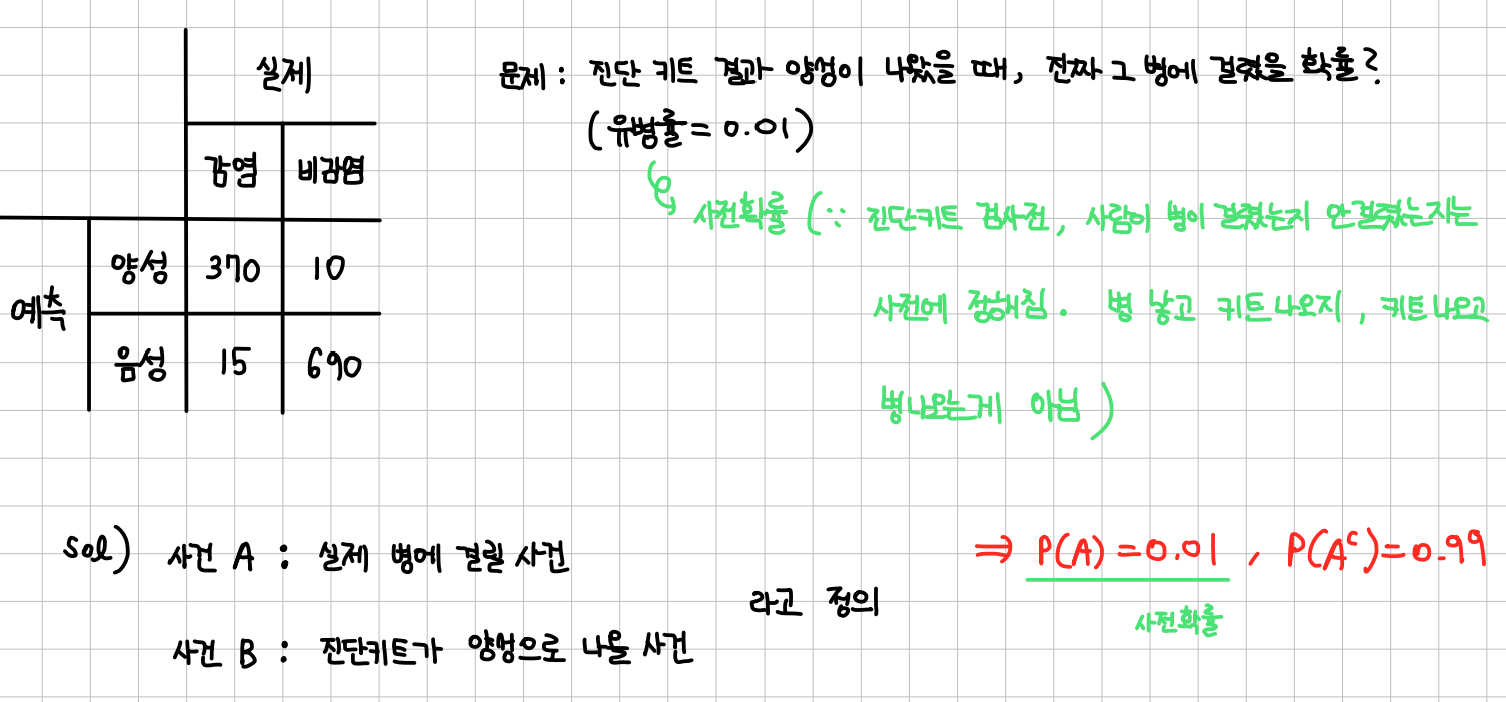

## < 24회 4번 :  신뢰구간 - 모분산을 알 때, 모를 때 >
주어진 데이터에서 신뢰구간을 구하려한다.  
정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]  
데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]  

1. 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

2. sigma = 0.04인걸 알고 있을때의 95% 신뢰구간을 구하라

### 접근 방법
- 모평균 구간추정은 크게 모분산을 알 때, 모를 때로 나뉨
1. 모분산 모르고, 30개 미만 → T-Test
    - 모분산은 모르는 경우 표본표표편차인 s를 대신 사용하여 추정과 검정을 진행
<img src ="https://i.esdrop.com/d/f/3uJKEwVXJL/KshvtIv9NH.jpg" width=400 />

2. 모분산 알면 → Z-Test
<img src ="https://i.esdrop.com/d/f/3uJKEwVXJL/oGpIEY6yss.jpg" width=400/>

3. 모분산 모르지만 30개 이상→ Z-Test 
    - 모분산은 모르는 경우 표본표표편차인 s를 대신 사용하여 추정과 검정을 진행
<img src ="https://i.esdrop.com/d/f/3uJKEwVXJL/RRLe7vqj5c.jpg" width=400 />

In [1]:
sample = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

### 4-1) 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라
- 모분산은 모르는 경우 표본표표편차인 s를 대신 사용하여 추정과 검정을 진행
- 표본의 개수가 9개로 적고, 모분산을 모르므로 t 분포를 이용한다.

In [9]:
import numpy as np
from scipy.stats import t

n = len(sample) # 표본의 크기 
mean = np.mean(sample) # 표본평균
s = np.std(sample) # 표본 표준편차
alpha = 0.05 # 유의수준
df = n-1

SE = s / np.sqrt(n) # 표준오차

# 자유도가 n-1인 t-분포의 0.025 위치에 해당하는 값 (t통계량)
t_value = t.ppf(1 - alpha/2, df)

ME = t_value * SE # 신뢰구간의 오차범위 (오차한계)
confidence_interval_1 = (mean - ME, mean + ME)  # 신뢰구간

# 소수점 아래 세 자리까지 출력
confidence_interval_1_rounded = (round(confidence_interval_1[0], 3),
                                 round(confidence_interval_1[1], 3))

print("모분산을 모르는 경우의 95% 신뢰구간:", confidence_interval_1_rounded)

모분산을 모르는 경우의 95% 신뢰구간: (3.501, 4.277)


### 4-2) sigma = 0.04인걸 알고 있을때의 95% 신뢰구간을 구하라
- sigma를 알고 있을 때의 신뢰구간은 z-분포를 이용

In [12]:
from scipy.stats import norm # z분포

n = len(sample) # 표본의 크기 
mean = np.mean(sample) # 표본평균
sigma = 0.04 
alpha = 0.05 # 유의수준

SE = sigma / np.sqrt(n) # 표준오차

z_value = norm.ppf(1 - alpha/2)
ME = z_value * SE # 허용오차

confidence_interval_2 = (mean - ME, mean + ME)  # 신뢰구간

# 소수점 아래 세 자리까지 출력
confidence_interval_2_rounded = (round(confidence_interval_2[0], 3),
                                 round(confidence_interval_2[1], 3))
print("sigma = 0.04인 경우의 95% 신뢰구간:", confidence_interval_2_rounded)

sigma = 0.04인 경우의 95% 신뢰구간: (3.863, 3.915)


---

# [ 23회 ]

## < 23회 1번 : 부호검정 >
- 시제품 샘플 농도 데이터
- 공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았다. 유의수준 5%에서 부호 검정하시오.   
(부호검정이라고 명시해준듯)

1. 귀무가설 연구가설 세우기
2. 유효한 데이터의 숫자는?
3. 검정통계량 및 연구 가설 채택 여부를 작성하라

In [15]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem2.csv')
df

,name,life span
0,sample1,10000
1,sample2,9000
2,sample3,9500
3,sample4,10000
4,sample5,10000
5,sample6,8900
6,sample7,9900
7,sample8,10100
8,sample9,10300
9,sample10,10020


### 접근방법
1. 부호검정은 표본의 순서를 이용하여 모집단의 중앙값에 대한 가설을 검정하는 비모수적인 방법
2. 일표본, 부호검정 -> 대칭성에 따라 일표본 부호검정 vs. 윌콕슨 검정 (엄격하게 따르지는 않는다고 하는듯)
3. wilcoxon 검정의 경우 대칭성을 전제로 함
4. 유효한 샘플 수 : 알려진 중앙값(모수)과 같은 값을 제외

### 2-1) 귀무가설, 대립가설 작성
- 귀무가설 H0 : 진공관 수명은 1만 시간과 차이가 없다. (진공관 모집단의 중위수는 1만 시간이다.)
- 대립가설 H1 : 진공관 수명은 1만 시간과 차이가 있다. 

In [ ]:
# import matplotlib.pyplot as plt

# # 'life span' 열을 사용하여 히스토그램 그리기
# plt.hist(problem2['life span'], bins=12)

# # 축과 타이틀 설정
# plt.xlabel('Life Span')
# plt.ylabel('Frequency')
# plt.title('Histogram of Life Span')

# # 그래프 보여주기
# plt.show()

### 2-2) 유효한 샘플의 수 계산

#### 알려진 중앙값과의 차이가 0이 아닌 데이터만 유효하다고 본다 !
#### '모수'와 같은 값을 제외하는 방식으로 유효 샘플수를 구함
- 유효한 샘플수를 계산할 때, 표본의 중위수와 같은 값을 제외해서 구했는데 잘못된 방식

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       12 non-null     object
 1   life span  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [17]:
# Shape[0] : 데이터프레임의 행의 개수를 반환
print('중위수와 동일한 데이터 수 :', 
      df[df['life span']==10000].shape[0])

# 10000이 아닌 값만 반환
df_fillter = df[df['life span'] != 10000]

중위수와 동일한 데이터 수 : 4


#### 총 데이터 개수 12개에서 10000과 같은 값 4개를 제외하면, 유효한 샘플 수는 8이 된다.

### 2-3) 검정통계량 및 연구가설 채택 여부를 작성

In [18]:
from scipy.stats import wilcoxon
static, pvalue = wilcoxon(df_fillter['life span']-10000)

print("검정통계량:", static)
print("p-value:", pvalue)

검정통계량: 8.5
p-value: 0.1953125


#### 검정통계량은 8.5,  p-value는 0.19로 0.05의 유의 수준에서 귀무가설을 기각할 수 없다. 
#### 따라서 진공관 수명은 1만 시간과 차이가 없다. 즉 진공관 수명은 1만 시간이라는 주장을 지지할 수 있다.

### 참고 : R 코드
- R에서 부호검정을 실시할 때는 BSDA패키지의 SIGN.test()함수를 이용하면 쉽게 수행할 수 있음

- 일표본 부호검정 R 코드

```R
# 일표본 부호검정
library(readr)

sign_test <- read.csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem2.csv")
sign_test

install.packages("BSDA")
library(BSDA)

SIGN.test(sign_test$life.span, 
          md=10000, # md : 귀무가설에서 설정한 중위수 값
          alternative = "two.sided")
          
          
# Output

	One-sample Sign-Test

data:  sign_test$life.span
s = 3, p-value = 0.7266
alternative hypothesis: true median is not equal to 10000
95 percent confidence interval:
  9531.909 10017.873
sample estimates:
median of x 
      10000 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level   L.E.pt   U.E.pt
Lower Achieved CI     0.8540 9800.000 10000.00
Interpolated CI       0.9500 9531.909 10017.87
Upper Achieved CI     0.9614 9500.000 10020.00

```


검정통계량 s는 3, p-value는 0.7266로 0.05의 유의 수준에서 귀무가설을 기각할 수 없다.  
따라서 진공관 수명은 1만 시간과 차이가 없다. 즉 진공관 수명은 1만 시간이라는 주장을 지지할 수 있다.  

- 일표본 윌콕슨 부호순위검정 R 코드
```R
result <- wilcox.test(x, mu = 0, alternative = "two.sided")
``` 

- 이표본 윌콕슨 부호순위검정 R 코드
```R
result <- wilcox.test(x, y = NULL, alternative = "two.sided", paired = TRUE)
```

## < 23회 2번 : 독립성 검정, 카이제곱 검정 >

아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라.

<img src="https://github.com/Datamanim/datarepo/blob/main/adp/23/problem4.png?raw=true" width=300 />

1. 귀무가설 연구가설 세우기
2. 학과와 성적이 독립일 경우의 기댓값을 구하시오
3. 검정통계량 및 연구 가설 채택 여부를 작성하라

### 접근 방법
1. 교차표 등장 -> 카이제곱 떠올리기
2. 학과, 학점 인원 수 -> 모두 범주형
3. 학과와 성적, 두 범주형 변수가 관계있는지 검정 -> '두 범주형 변수의 관계, 연관성'은 곧 '독립성 검정'
4. 카이제곱검정 - 독립성 검정 시행!

### 2-1) 귀무가설, 대립가설 작성
- 귀무가설 : 학과와 성적은 관련이 없다 (독립이다)
- 연구가설 : 학과와 성적은 관련이 있다 (독립이 아니다)

### 2-2) 학과와 성적이 독립일 경우의 기댓값을 구하시오.

In [4]:
problem2 = pd.DataFrame({'사회과학':[15,60,24],
                         '자연과학':[25,69,5],
                         '공학':[10,77,13]})
problem2.index = ['1.5-2.5', '2.5-3.5', '3.5-4.5']
problem2

,사회과학,자연과학,공학
1.5-2.5,15,25,10
2.5-3.5,60,69,77
3.5-4.5,24,5,13


In [5]:
from scipy.stats import chi2_contingency

chi2, p, df, expected = chi2_contingency(problem2)
print(expected)

# chi2_contingency(problem2)

[[16.61073826 16.61073826 16.77852349]
 [68.43624161 68.43624161 69.12751678]
 [13.95302013 13.95302013 14.09395973]]


### 2-3) 검정통계량 구하고 연구가설의 채택여부 작성

In [12]:
print("검정통계량 : ", round(chi2, 5))
print("p-value : ", round(p, 5))

검정통계량 :  22.13692
p-value :  0.00019


#### 위 형태에서 검정 통계량은 22.13692, p-value는 0.00019로 나타났다. 
#### 유의수준 0.05에서 p-value 값이 유의수준보다 작기 때문에 귀무가설을 기각한다. 따라서 학과와 성적은  관련이 있다고 말할 수 있다.

## < 23회 3번 : 시계열 군집분석 >
- 코로나 시계열 데이터
- 일자/국가명/확진자수
- 데이터 출처(후처리과정 미포함) : https://www.kaggle.com/antgoldbloom/covid19panels?select=country_panel.csv 

In [1]:
import pandas as pd
problem3 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem3_covid2.csv')
problem3.head()

,location,date,new_cases
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,1391.0
2,Austria,2021-01-03,1466.0
3,Austria,2021-01-04,1642.0
4,Austria,2021-01-05,2311.0


### 3-1) 데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라

In [2]:
# 일자별 각 나라의 일일 확진자 수를 그룹핑하여 누적합(cumulative sum) 구하기
problem3_cumsum = problem3.groupby(['location', 
                                    'date'])['new_cases'].sum().groupby(level=0).cumsum()

# 결과 데이터프레임 생성
problem3_result = pd.DataFrame(problem3_cumsum)
problem3_result = problem3_result.reset_index()
problem3_result.columns = ['location', 'date', 'cumulative_cases']

# 결과 출력
problem3_result.head()

  location        date  cumulative_cases
0  Austria  2021-01-01            2096.0
1  Austria  2021-01-02            3487.0
2  Austria  2021-01-03            4953.0
3  Austria  2021-01-04            6595.0
4  Austria  2021-01-05            8906.0


In [3]:
# 이해를 돕기위한 확인용
# con = problem3.groupby(['location', 'date'])['new_cases'].cumsum()
# con.head()

# 이렇게 되면 나라별, 날짜별로 new_cases 누적합해봤자 날짜가 다 다르게 적용되니 값이 그대로 나옴
# 따라서 한번더 level=0 으로 groupby 한 후 cumsum 해줘야함

0    2096.0
1    1391.0
2    1466.0
3    1642.0
4    2311.0
Name: new_cases, dtype: float64

### 3-2) ACF 구하기, ACF로 distance
1에서 구한 데이터를 각 나라별로 ACF값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외하라), 국가를 기준으로 ACF를 이용해 distance를 구하라. 

- acf_values[0:]는 acf_values의 전체 값을 가져오는 것을 의미. 즉, 자기상관 함수의 모든 값이 포함된 리스트를 반환한다.
- 일반적으로 자기상관 함수에서 첫 번째 값은 1로 고정되어 있으므로, 분석 목적에 따라 첫 번째 값은 제외하고 다음 값부터 사용하는 것이 일반적
- acf_values[1:]를 사용하여 첫 번째 값을 제외하고 자기상관 함수 값을 추출

In [10]:
from scipy.spatial import distance
import statsmodels.api as sm

# 각 나라별 ACF 값 계산
name = []

# 해당 location에 대한 cumulative_cases 컬럼을 추출하여 시계열 데이터로 사용
# loc와 자기상관 함수 값인 v[1:]를 리스트로 묶어 name 리스트에 추가
for loc in problem3_result.location.unique():
    acf_values = sm.tsa.stattools.acf(problem3_result[problem3_result.location == loc]\
                                      ['cumulative_cases'], 
                                      nlags=50, 
                                      fft=False) 
    name.append([loc] + list(acf_values[1:]))  

acf_df = pd.DataFrame(name)
acf_df.head() 

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,Austria,0.986910,0.973895,0.961027,0.948347,0.935884,0.923563,0.911388,0.899286,0.887245,...,0.520420,0.509183,0.497960,0.486745,0.475543,0.464370,0.453267,0.442242,0.431334,0.420483
1,Bangladesh,0.993958,0.987757,0.981401,0.974895,0.968240,0.961439,0.954491,0.947394,0.940150,...,0.644404,0.633643,0.622824,0.611950,0.601019,0.590035,0.579005,0.567934,0.556820,0.545668
2,Bhutan,0.994586,0.989147,0.983590,0.977976,0.972226,0.966459,0.960636,0.954678,0.948797,...,0.700749,0.691193,0.681564,0.671847,0.662047,0.652165,0.642174,0.632091,0.621911,0.611642
3,Chile,0.992455,0.984846,0.977165,0.969415,0.961598,0.953711,0.945768,0.937768,0.929723,...,0.647890,0.638302,0.628672,0.618999,0.609285,0.599527,0.589710,0.579831,0.569911,0.559947
4,Colombia,0.993340,0.986596,0.979760,0.972838,0.965857,0.958820,0.951729,0.944587,0.937384,...,0.679471,0.670459,0.661382,0.652238,0.643029,0.633751,0.624406,0.615000,0.605532,0.596002


In [23]:
# 국가를 기준으로 ACF 값을 이용해 거리 계산
dist_matrix = distance.squareform(distance.pdist(acf_df.iloc[:, 1:], metric='euclidean'))
dist_df = pd.DataFrame(dist_matrix, index=acf_df.iloc[:, 0], columns=acf_df.iloc[:, 0])

dist_df.head()

,Austria,Bangladesh,Bhutan,Chile,Colombia,Costa Rica,Dominica,Dominican Republic,Eswatini,Ethiopia,...,Palau,Poland,Portugal,Russia,Saint Pierre and Miquelon,Slovenia,Solomon Islands,Tunisia,Uruguay,Vanuatu
0,,,,,,,,,,,,,,,,,,,,,
Austria,0.000000,0.695750,0.968077,0.675538,0.835995,0.529079,0.871321,0.338206,0.189740,0.178802,...,1.338832,0.226343,0.794202,0.199574,0.987467,0.298763,0.104651,0.662252,0.845863,0.297836
Bangladesh,0.695750,0.000000,0.278343,0.067448,0.162990,0.172966,1.552049,0.398954,0.567603,0.530821,...,2.029987,0.499366,1.480636,0.524374,1.663077,0.989232,0.732873,0.059057,0.156793,0.975552
Bhutan,0.968077,0.278343,0.000000,0.293359,0.136996,0.439539,1.829406,0.652772,0.845886,0.807515,...,2.304289,0.777323,1.744871,0.787310,1.922267,1.257016,1.008270,0.305996,0.122696,1.240930
Chile,0.675538,0.067448,0.293359,0.000000,0.160874,0.147441,1.540228,0.361766,0.562880,0.518830,...,2.012874,0.493143,1.452266,0.494354,1.631659,0.963817,0.718622,0.019977,0.172433,0.949716
Colombia,0.835995,0.162990,0.136996,0.160874,0.000000,0.308191,1.701053,0.516565,0.721971,0.679438,...,2.173173,0.652546,1.609043,0.652240,1.785880,1.122564,0.878930,0.175974,0.043327,1.107345


### 3-3) 유클리디안 거리 클러스터링을 진행 후, 계층적 군집 분석을 위해 덴드로그램 작성하라.

```python 
cutoff = 0.3*max(dend3[:,2]) 
```
- 세 번째 열은 클러스터의 결합 거리(연결 거리)
- 연결 거리는 각 클러스터가 서로 결합된 시점의 거리를 나타내며, 덴드로그램에서 클러스터를 나누는 기준으로 사용

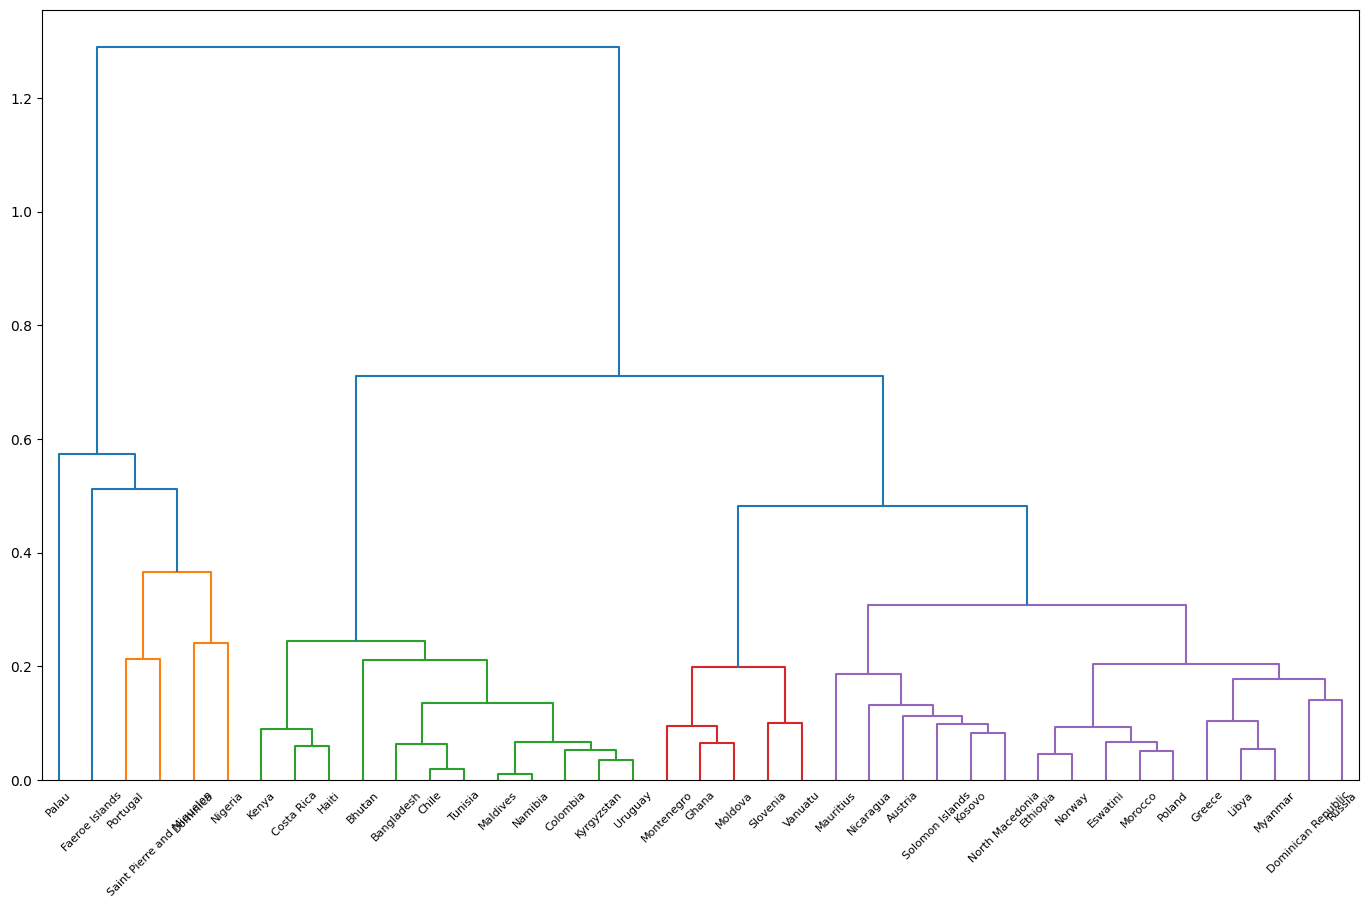

In [22]:
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

data = acf_df.set_index(0) # 국가명을 index로 지정
label = np.array(data.index) 

fig = plt.figure(figsize=(17,10))
ax3 = fig.add_subplot(1,1,1)

# 계층적 군집분석 수행
dend3 = sch.linkage(data.values, 
                    method='average', 
                    metric='euclidean')

# 덴드로그램에서 클러스터를 나누는 기준인 임계값(cutoff)을 설정
# 여기서는 최대 연결 거리의 30%를 임계값으로 사용
# 해당 값 이상의 거리에서 클러스터가 서로 다른 색상으로 구분

cutoff = 0.3*max(dend3[:,2]) 
dend_res3 = sch.dendrogram(dend3, 
                           color_threshold=cutoff) 

ax3.set_xticklabels(label[dend_res3['leaves']], minor=False)

plt.show()

---

# [ 22회 ]

## < 22회 1번 : 일표본 분산검정 (카이제곱검정) >
- 금속 성분 함유량 데이터(변수 1개)
- 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았다. 분산에 대해 검정을 수행하시오. (유의확률 0.05)

1. 연구가설과 귀무가설 작성
2. 양측 검정 시행
3. 검정통계량, 가설채택

In [34]:
import pandas as pd

var_test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv')
var_test.head()

,content
0,97.995295
1,101.478315
2,102.284913
3,98.993634
4,104.635232


### 접근 방법
1. Chi-square test for a single variance
2. 일표본 분산 검정은 카이제곱 통계량을 따름
<img src = "https://i.esdrop.com/d/f/3uJKEwVXJL/c9ZKgwq8yP.jpg" width=200 />
3. Python에 패키지가 없으므로 R사용
    - EnvStats의 varTest

### 1-1) 연구가설과 귀무가설 작성
- 귀무가설(H0) : 제품들의 금속 재질 함유량 분산은 1.3이다.
- 대립가설(H1) : 제품들의 금속 재질 함유량 분산은 1.3이 아니다.

### 1-2) 양측 검정 시행

### 1-3) 검정통계량, 가설채택

``` R 
# code
library(readr)

df <- read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv")
df


library("EnvStats")

# 단일 분산에 대한 카이제곱 검정을 수행하는 함수
# 귀무가설로 설정할 분산의 값
chi_vartest <- varTest(df$content, 
                       alternative = "two.sided",
                       conf.level = 0.95, 
                       sigma.squared = 1.3) #  귀무가설로 설정할 분산의 값

print(chi_vartest$statistic)
p <- chi_vartest$p.value
formatted <- sprintf("%.3f", p) # 소수점 세자리까지
print(formatted)
```

```R
# Output

> print(chi_vartest$statistic)
Chi-Squared 
   328.2923 

> p <- chi_vartest$p.value
> formatted <- sprintf("%.3f", p)
> print(formatted)
[1] "0.000"

        
# 그냥 함수 실행하면 모든 값 출력
> varTest(df$content, 
+         alternative = "two.sided",
+         conf.level = 0.95, 
+         sigma.squared = 1.3) #  귀무가설로 설정할 분산의 값
$statistic
Chi-Squared 
   328.2923 

$parameters
 df 
199 

$p.value
[1] 4.272667e-08

$estimate
variance 
2.144623 

$null.value
variance 
     1.3 

$alternative
[1] "two.sided"

$method
[1] "Chi-Squared Test on Variance"

$data.name
[1] "df$content"

$conf.int
     LCL      UCL 
1.778549 2.637274 
attr(,"conf.level")
[1] 0.95

attr(,"class")
[1] "htestEnvStats"
```

#### 일표본 분산 검정에는 카이제곱검정 통계량을 이용하고, R에서 EnvStats의 VarTest 함수를 이용할 수 있다.
#### 검정 결과 p-value값이 유의수준 0.05보다 작으므로, 귀무가설을 기각한다. 
#### 따라서, 제품들의 금속 재질 함유량 분산은 1.3이 아니라고 할 수 있다.

### 참고 : python 함수로 구현
- 정규분포 모분산 검정

In [33]:
# 정규분포 모분산 검정
import numpy as np
import scipy.stats as stats

def pvar_test(sample, var0, alpha=0.05):
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)
    
    y = (n-1)*u_var / var0
    
    if interval[0] <= y <= interval[1]:
        print("귀무가설을 채택")
    else:
        print("귀무가설을 기각")
    
    if y < rv.isf(0.5):
        p = rv.cdf(y)*2
    else:
        p = (1-rv.cdf(y))*2
    print(f'p값은 {p:.3f}')

In [35]:
pvar_test(var_test.values, 1.3, alpha=0.05)

귀무가설을 기각
p값은 0.000


## < 22회 2번 : 관리도 > 
Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)

1. 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기
2. 관리도 시각화


In [21]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/error.csv')
df.head()

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5


In [12]:
df.shape

(100, 2)

In [11]:
df["iot_number"].value_counts()

1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: iot_number, Length: 100, dtype: int64

### 접근 방법 
<img src="https://i.esdrop.com/d/f/3uJKEwVXJL/9YhsmW6Xpw.png"/>

#### 관리도 : SPC  Statstic Process Control 로서 기본적으로 +/-3 시그마로 이상치를 탐색하기 위한 도구

- 관리 중심선 = 평균
- 관리 상한선, 하한선은 평균 기준 3표준편차씩 거리에 위치한 선
<br></br>
- p : lot별 생산수량 n or s = 200 지정해줌 -> 불량개수/200(총사이즈)
<br></br>
- CL은 중심선(Center Line)으로, 공정에서 불량품의 평균 비율을 나타냄
     - 이는 모든 표본에서의 불량품 비율의 평균으로 계산

### 2-1) 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

In [24]:
# Lot별 불량 수량 계산
lot_counts = df_p.groupby('iot_number')['error_case_number'].sum()
display(lot_counts)

# 관리중심선(CL) : 평균 불량 수량 
CL = lot_counts.mean()
print(CL)

iot_number
1      4.5
2      2.5
3      2.0
4      3.0
5      0.5
      ... 
96     2.0
97     3.0
98     5.5
99     2.0
100    1.0
Name: error_case_number, Length: 100, dtype: float64

3.41


In [27]:
import statistics
import matplotlib.pyplot as plt

size = 200

# 불량이 날 확률
df["p"] = df["error_case_number"]/size

CL = df["p"].mean()
UCL = statistics.mean(df["p"]) + 3 * (np.sqrt((statistics.mean(df["p"]) \
                                               * (1 - statistics.mean(df["p"])))/(size)))
LCL = statistics.mean(df["p"]) - 3 * (np.sqrt((statistics.mean(df["p"]) \
                                               * (1 - statistics.mean(df["p"])))/(size)))


print("관리 중심선 : ", CL)
print("관리 상한선 : ", UCL)
print("관리 하한선 : ", LCL)

관리 중심선 :  0.017049999999999992
관리 상한선 :  0.04451212641985322
관리 하한선 :  -0.010412126419853219


### 2-2) 관리도 시각화

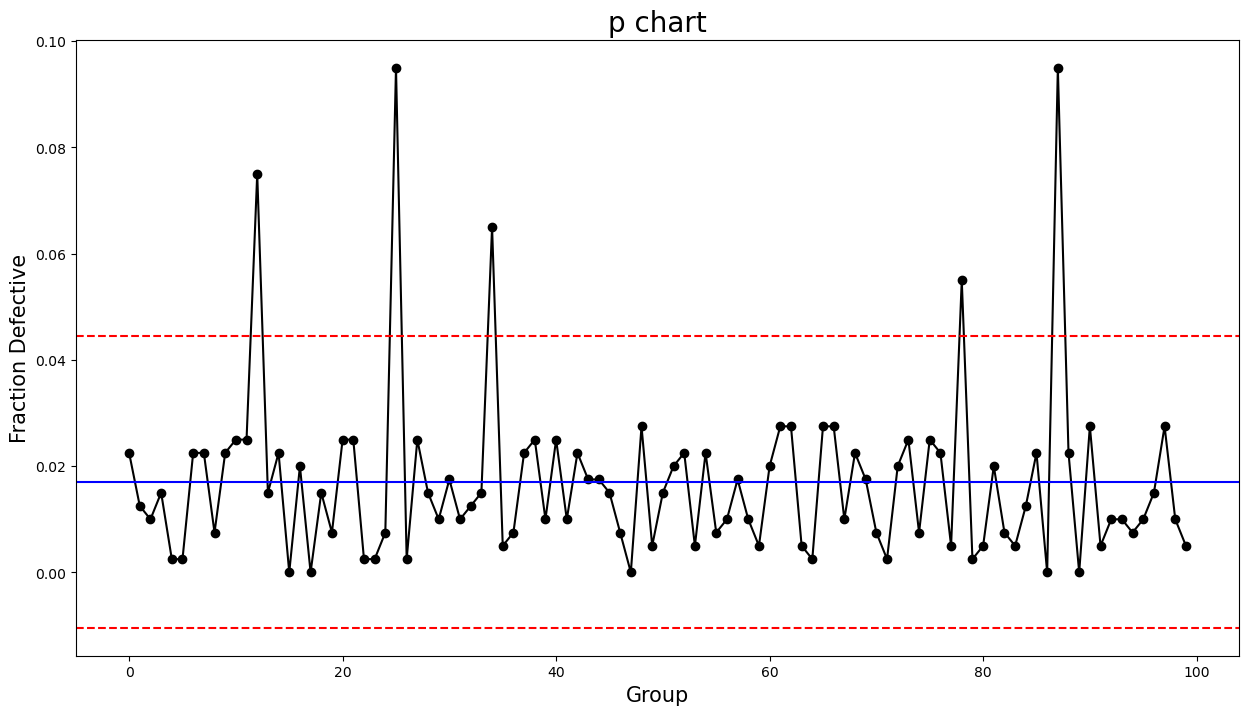

In [28]:
# plot p-chart
plt.figure(figsize=(15, 8))
plt.plot(df["p"], linestyle="-", marker="o", color="black")

plt.axhline(statistics.mean(df["p"]) \
            + 3 * (np.sqrt((statistics.mean(df["p"]) \
                            * (1 - statistics.mean(df["p"])))/(size))), 
            color="red", linestyle="dashed")

plt.axhline(statistics.mean(df["p"]) \
            - 3 * (np.sqrt((statistics.mean(df["p"]) \
                            * (1 - statistics.mean(df["p"])))/(size))), 
            color="red", linestyle="dashed")

plt.axhline(statistics.mean(df["p"]), color="blue")

plt.title("p chart", fontsize=20)
plt.xlabel("Group", fontsize=15)
plt.ylabel("Fraction Defective", fontsize=15)
plt.show()

### 참고 : 표준편차 시그마 관점

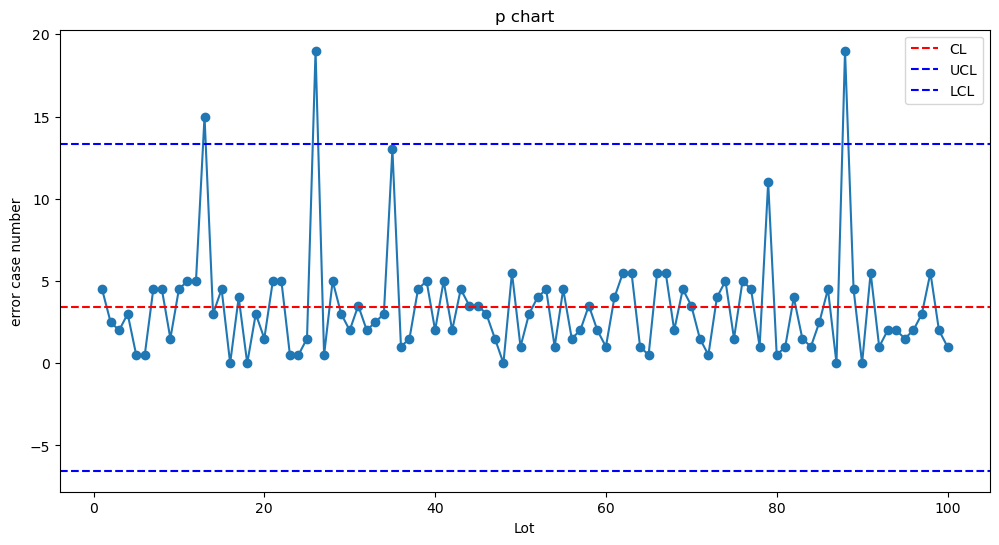

관리중심선(CL): 3.41
관리 상한선(UCL): 13.358458080618231
하한선(LCL): -6.538458080618231


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
df_p = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/error.csv')

# Lot별 불량 수량 계산
lot_counts = df_p.groupby('iot_number')['error_case_number'].sum()

# 관리중심선(CL) 계산
cl = lot_counts.mean()

# 표준편차 계산
sigma = lot_counts.std()

# 관리 상한선(UCL), 하한선(LCL) 계산
ucl = cl + 3 * sigma
lcl = cl - 3 * sigma

# 관리도 시각화
plt.figure(figsize=(12, 6))
plt.plot(lot_counts.index, lot_counts.values, marker='o')
plt.axhline(cl, color='r', linestyle='--', label='CL')
plt.axhline(ucl, color='b', linestyle='--', label='UCL')
plt.axhline(lcl, color='b', linestyle='--', label='LCL')
plt.xlabel('Lot')
plt.ylabel('error case number')
plt.title('p chart')
plt.legend()
plt.show()

# 결과 출력
print('관리중심선(CL):', cl)
print('관리 상한선(UCL):', ucl)
print('하한선(LCL):', lcl)

## < 22회 3번 : 반복문/제약조건 사용 >
제품 1, 2를 만드는 데 재료 a, b, c가 일부 사용되며, 제품 1과 2를 만들 때 12만원과 18만원을 벌 수 있다. 재료는 한정적으로 주어지는데, 이때 최대 수익을 낼 수 있을 때의 제품 1과 제품 2의 개수를 구하라.

- 재료 공급량 {a: 1300, b: 1000, c: 1200}

| 구분 | 재료 a | 재료 b | 재료 c |
| --- | --- | --- | --- |
| 제품 1 | 20 | 20 | 20 |
| 제품 2 | 40 | 30 | 30 |

### 접근 방법 1
1. 임의의 제품1과 제품2의 조합을 생성
2. 각 조합별 재료를 합산
3. 제약조건에 부합하는지 확인
4. 수익 계산 후 최대 수익이 나는 조합 확인

In [5]:
import pandas as pd
import numpy as np

# 임의의 x, y 개수에 대한 조합 생성
df = pd.DataFrame(
    {
        'n_x': np.array([[y for y in range(0, 100)] for x in range(0, 100)]).flatten(),
        'n_y': np.array([[x for y in range(0, 100)] for x in range(0, 100)]).flatten()
    }
)

# 재료 
df['a'] = df['n_x'] * 20 + df['n_y'] * 40
df['b'] = df['n_x'] * 20 + df['n_y'] * 30
df['c'] = df['n_x'] * 20 + df['n_y'] * 30

# 제약 조건
df['is_possible'] = (df['a'] <= 1300) & (df['b'] <= 1000) & (df['c'] <= 1200)

# 수익 계산
df['profit'] = df['n_x'] * 12 + df['n_y'] * 18

# 수익 기준 내림차순 정렬
df.loc[df.is_possible & (df.profit==600)].sort_values('profit', ascending=False)

,n_x,n_y,a,b,c,is_possible,profit
50,50,0,1000,1000,1000,True,600
247,47,2,1020,1000,1000,True,600
444,44,4,1040,1000,1000,True,600
641,41,6,1060,1000,1000,True,600
838,38,8,1080,1000,1000,True,600
1035,35,10,1100,1000,1000,True,600
1232,32,12,1120,1000,1000,True,600
1429,29,14,1140,1000,1000,True,600
1626,26,16,1160,1000,1000,True,600
1823,23,18,1180,1000,1000,True,600


## < 22회 4번 : 일표본 Run 검정 >
상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다.

[a, a, b, b, a, a, a, a, b, b, b, b, b, a, a, b, b, a, b, b ]

1) 구매 패턴으로 볼 때 두 상품이 연관이 있는지 가설을 세우고 검정하시오.  
2) 가설을 채택하시오.

### 접근 방법
#### Run-test : 일련의 연속적인 관측값들이 임의적(random)으로 나타난 것인지를 검정하는 방법
- 관측값들이 얻어진 순서에 근거하는 비모수적 검정법

<img src="https://user-images.githubusercontent.com/54492747/134380617-2e9ed1e2-0a98-405f-bbcf-bf49d9d59364.png">

### 4-1) 구매 패턴으로 볼 때 두 상품이 연관이 있는지 가설을 세우고 검정하시오.
- 귀무가설: 연속적인 관측값이 임의적이다(연관성이 **없다**).
- 대립가설: 연속적인 관측값이 임의적이 아니다(연관성이 **있다**).

In [3]:
import pandas as pd
from statsmodels.sandbox.stats.runs import runstest_1samp

data = pd.DataFrame({
    'product': ['a', 'a', 
                'b', 'b', 
                'a', 'a', 'a', 'a',
                'b', 'b', 'b', 'b', 'b',
                'a', 'a',
                'b', 'b',
                'a',
                'b', 'b']})

# 데이터를 수치형으로 변환
data['product'].replace({'a': 1, 'b': 0}, inplace=True)

runtest = runstest_1samp(data['product'])
print(f'statistics: {runtest[0]:.6f}, p-value: {runtest[1]:.6f}')

# statistics: -1.114488, p-value: 0.265070

statistics: -1.114488, p-value: 0.265070


### 4-2) 가설을 채택하시오.
검정 결과 p-value는 유의수준 0.05보다 크므로, 귀무가설을 기각할 수 없다. 즉 상품 a와 b의 구매에는 연관이 없다고 할 수 있다.

---

# [ 21회 ]

## < 21회 1번 : 이원분산분석 >
이원분산분석을 수행하고 통계표를 작성하시오. 
- 변수 3개(하나는 수치형 변수/ 나머지 두 개는 범주형 변수)
- 원래 시험 : 변수 3개(하나는 abcde 각각을 값으로 갖는 범주형 변수, 나머지 두 개는 수치형 연속변수)

In [9]:
import pandas as pd
import numpy as np

avocado = pd.read_csv('../Data/avocado.csv')
avocado = avocado[["AveragePrice","type","region"]]
avocado = avocado[(avocado['region']=='Orlando') |\
                  (avocado['region']=='Boston' )|\
                  (avocado['region']=='Chicago')].reset_index(drop=True)
avocado

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


### 접근 방법
- 이원분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법
- 독립변수 두 개 이상 집단 간 차이가 유의한지 검증

### 가설
<b> 가. 교호작용효과 검정에 대한 가설</b><br>
    1) 귀무가설 H0: region과 avocado type 간에는 교호작용 효과가 없다. <br>
    2) 대립가설 H1: region과 avocado type 간에는 교호작용 효과가 있다. <br>


<b> 나. 주효과 검정에 대한 가설</b> <br>
    1) 귀무가설 H0: region 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
    2) 대립가설 H1: region 종류에 따른 AveragePrice 차이는 존재한다. <br> 
    3) 귀무가설 H0: type 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
    4) 대립가설 H1: type 종류에 따른 AveragePrice 차이는 존재한다. <br> 

In [10]:
# 독립변수 type,region / 종속변수 AveragePrice을 Series로 변경 
AveragePrice = avocado["AveragePrice"]
avocado_type = avocado["type"]
region = avocado["region"]

In [11]:
# 분산분석 수행 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# C() :범주형(factor) 변수로 취급하며, 이를 컬럼으로 변환
formula = 'AveragePrice ~ C(avocado_type) * C(region)' 
model = ols(formula, avocado).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


[결과해석] 

1. 주효과(type,region) 모두 AveragePrice에 영향을 미침. (2개 인자 모두 pvalue가 일반적인 유의수준 0.05이하임)
    - 단 주효과중에서 type의 영향력이 훨씬 더 큼.(p value값)
    - region은 p값이 0.05근처로서, 통계적으로 경계에 있기 때문에, 주의깊게 확인 필요

2. 교호작용 인자도 유의하다.(교호작용 있음) p-value 0.05 이하임

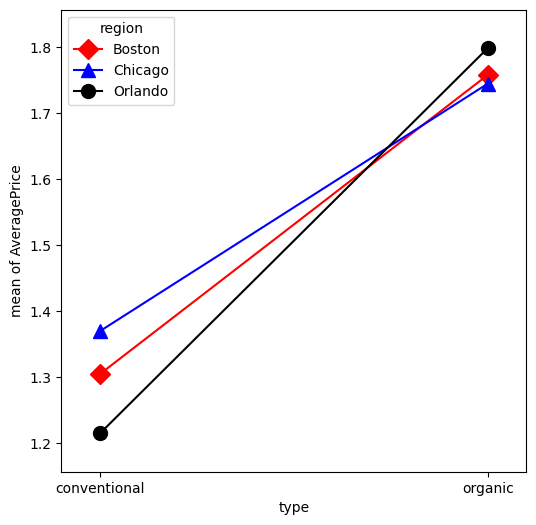

In [12]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(avocado_type, 
                       region , 
                       AveragePrice,colors=['red', 'blue', 'black'], 
                       markers=['D', '^','o'], 
                       ms=10, 
                       ax=ax)

[그래프 해석] 각 선들의 패턴이 다름(교차함) --> region과 type사이에 교호작용 존재함

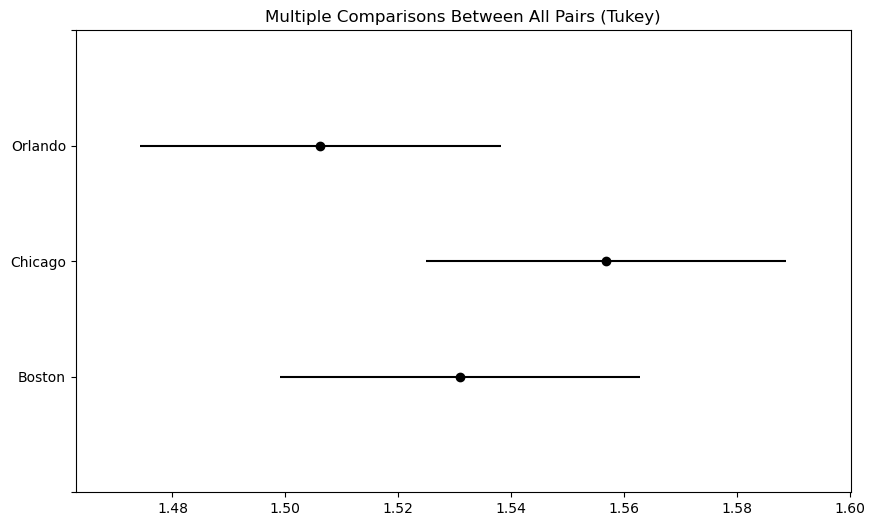

In [13]:
# 다중비교 참고

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data= avocado["AveragePrice"], groups=avocado["region"] )
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()

In [14]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Boston,Chicago,0.0259,0.6073,-0.0379,0.0897,False
Boston,Orlando,-0.0247,0.6356,-0.0885,0.0391,False
Chicago,Orlando,-0.0506,0.151,-0.1144,0.0132,False
